# House heating optimization - experiments
---

In this experiment we have implemented the following approach of modeling the heat conductation in an appartment.

\begin{align} 
    \begin{cases}
        u_t = \Delta u + f(x, u) &x \in A_i, \\
        \nabla u \cdot n = 0 &x \in \mathcal{W}_i, \\
        u = g(t) &x \in W_i, \\
        u = \frac{1}{|D_i|} \int_{D_i} u(x,t) \:dx &x \in D_i, \\
        u(x, 0) = u_0(x).
    \end{cases}
\end{align}

We denote the unit normal vector $n$ and the force term $f$ given by the following formula

## Packages
---

In [21]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters grid
---

In [22]:
model_parameters = {
        "areas": {
            "A1": {
                "row_min": 0, "row_max": 33, "col_min": 0, "col_max": 50,
                "init_func": lambda x: 295 + np.random.random(x.shape),
                "desired_temp": 300
            },
            "A2": {
                "row_min": 0, "row_max": 27, "col_min": 50, "col_max": 100,
                "init_func": lambda x: 298 + np.random.random(x.shape),
                "desired_temp": 300
            },
            "A3": {
                "row_min": 27, "row_max": 55, "col_min": 50, "col_max": 100,
                "init_func": lambda x: 297 + np.random.random(x.shape),
                "desired_temp": 300
            },
            "A4": {
                "row_min": 33, "row_max": 66, "col_min": 0, "col_max": 33,
                "init_func": lambda x: 296 + np.random.random(x.shape),
                "desired_temp": 300
            },
            "A5": {
                "row_min": 66, "row_max": 100, "col_min": 0, "col_max": 50,
                "init_func": lambda x: 298 + np.random.random(x.shape),
                "desired_temp": 300
            },
            "A6.1": {
                "row_min": 33, "row_max": 66, "col_min": 33, "col_max": 50,
                "init_func": lambda x: 295 + np.random.random(x.shape),
                "desired_temp": 300
            },
            "A6.2": {
                "row_min": 55, "row_max": 100, "col_min": 50, "col_max": 65,
                "init_func": lambda x: 295 + np.random.random(x.shape),
                "desired_temp": 300
            },
            "A7": {
                "row_min": 55, "row_max": 100, "col_min": 65, "col_max": 100,
                "init_func": lambda x: 288 + np.random.random(x.shape),
                "desired_temp": 300
            }
        },
        "walls": {
            "VV1": {
                "row_min": 0, "row_max": 100, "col_min": 0, "col_max": 1
            },
            "VV2": {
                 "row_min": 0, "row_max": 1, "col_min": 0, "col_max": 100
            },
            "VV3": {
                 "row_min": 0, "row_max": 100, "col_min": 99, "col_max": 100
            },
            "VV4": {
                "row_min": 99, "row_max": 100, "col_min": 0, "col_max": 100
            },
            "VV5": {
                "row_min": 0, "row_max": 55, "col_min": 49, "col_max": 51
            },
            "VV6": {
                "row_min": 26, "row_max": 28, "col_min": 64, "col_max": 100
            },
            "VV7": {
                "row_min": 32, "row_max": 34, "col_min": 0, "col_max": 34
            },
            "VV8": {
                "row_min": 33, "row_max": 45, "col_min": 32, "col_max": 34
            },
            "VV9": {
                "row_min": 55, "row_max": 66, "col_min": 32, "col_max": 34
            },
            "VV10": {
                "row_min": 65, "row_max": 67, "col_min": 0, "col_max": 34
            },
            "VV11": {
                "row_min": 65, "row_max": 100, "col_min": 49, "col_max": 51
            },
            "VV12": {
                "row_min": 55, "row_max": 100, "col_min": 64, "col_max": 66
            },
            "VV13": {
                "row_min": 54, "row_max": 56, "col_min": 64, "col_max": 100
            }
        },
        "doors": {
            "D1": {
                "row_min": 32, "row_max": 34, "col_min": 34, "col_max": 49
            },
            "D2": {
                "row_min": 26, "row_max": 28, "col_min": 51, "col_max": 66
            },
            "D3": {
                "row_min": 54, "row_max": 56, "col_min": 51, "col_max": 66
            },
            "D4": {
                "row_min": 65, "row_max": 67, "col_min": 34, "col_max": 49
            },
            "D5": {
                "row_min": 45, "row_max": 55, "col_min": 32, "col_max": 34
            },
            "D6": {
                "row_min": 55, "row_max": 65, "col_min": 49, "col_max": 51
            }
        },
        "windows": {
            "W1": {
                "row_min": 0, "row_max": 1, "col_min": 15, "col_max": 35
            },
            "W2": {
                "row_min": 0, "row_max": 1, "col_min": 70, "col_max": 90
            },
            "W3": {
                "row_min": 30, "row_max": 40, "col_min": 99, "col_max": 100
            },
            "W4": {
                "row_min": 99, "row_max": 100, "col_min": 15, "col_max": 35
            }
        },
        "radiators": {
            "R1": {
                "row_min": 2, "row_max": 3, "col_min": 10, "col_max": 35, "mask_value": 1
            },
            "R2": {
                "row_min": 2, "row_max": 3, "col_min": 52, "col_max": 66, "mask_value": 2
            },
            "R3": {
                "row_min": 35, "row_max": 43, "col_min": 30, "col_max": 31, "mask_value": 3
            },
            "R4": {
                "row_min": 97, "row_max": 98, "col_min": 10, "col_max": 35, "mask_value": 4
            }
        },
        "domain": {
            "grid": np.meshgrid(np.linspace(-1, 1, 101), np.linspace(-1, 1, 101))[0], "dx": 1
        },
        "force_term": lambda x, t, mask: np.where(
            mask == 1, 10**(-1), np.where(
                mask == 2, 10**(-1), np.where(
                    mask == 3, 10**(-1), np.where(
                        mask == 4, 10**(-1), 0
                    )
                )
            )
        ),
        "window_temp": lambda t: 280 - 5 * np.sin(24 * t / 3600),
        "diffusion_coefficient": 0.1,
        "current_time": 0.0

    }

## Setting up the model
---

In [23]:
from main import HeatingModel

In [27]:
model = HeatingModel(model_parameters)

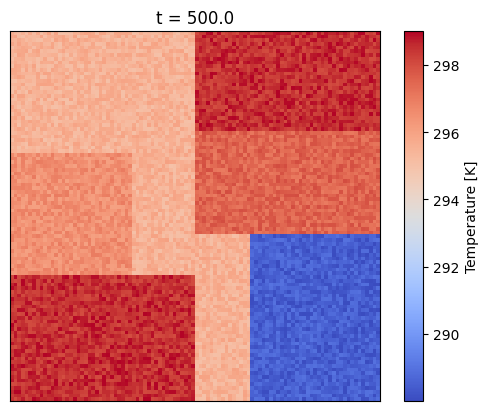

TIME STEPS: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 921.37it/s]


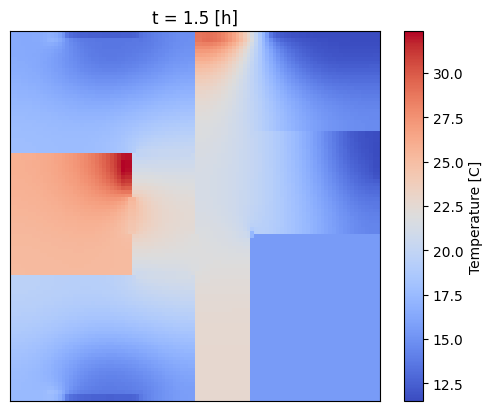

In [28]:
plt.imshow(model.result_matrix, cmap=plt.get_cmap("coolwarm"))
plt.title(f"t = {model.params['current_time']}")
plt.colorbar().set_label("Temperature [K]")
plt.xticks([])
plt.yticks([])
plt.show()
model.evolve(10000, 0.5)
model.result_matrix -= 273
plt.imshow(model.result_matrix, cmap=plt.get_cmap("coolwarm"))
plt.title(f"t = {round(model.params['current_time'] / 3600, 1)} [h]")
plt.colorbar().set_label("Temperature [C]")
plt.xticks([])
plt.yticks([])
plt.show()
model.build_image_frame().resize((500, 500)).show()
plt.show()